In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import PIL
import pathlib 
import glob
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Activation,Rescaling,Flatten
from keras.activations import relu,softmax
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

#### Loading the dataset

In [2]:
dataset_dir = pathlib.Path("images/")
images = list(dataset_dir.glob("*/*.jpeg"))
print(f"Number of images : {len(images)}")

Number of images : 25000


In [3]:
batch_size = 128
img_height = 227 
img_width = 227 

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=100,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 25000 files belonging to 5 classes.
Using 20000 files for training.


In [5]:
validatation_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=100,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 25000 files belonging to 5 classes.
Using 5000 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']


In [7]:
autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=autotune)
validatation_ds = validatation_ds.cache().prefetch(buffer_size=autotune)

#### Creating the Alexnet model

In [8]:
model1 = Sequential()

model1.add(Rescaling(1./255,input_shape=(img_height,img_width,3)))
model1.add(Conv2D(filters=96,strides=4,padding="valid",activation='relu',kernel_size=(11,11)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(3,strides=2))

model1.add(Conv2D(kernel_size=(5,5),filters=256,strides=1,padding="same",activation='relu'))
model1.add(MaxPooling2D(3,strides=2))

model1.add(Conv2D(filters=384,kernel_size=(3,3),strides=1,padding="same",activation='relu'))
model1.add(Conv2D(filters=384,kernel_size=(3,3),strides=1,padding="same",activation='relu'))
model1.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',strides=1,padding="same"))
model1.add(MaxPooling2D(3,strides=2))
model1.add(Dropout(0.5))

model1.add(Flatten())

model1.add(Dense(4096,activation='relu'))
model1.add(Dense(4096,activation='relu'))
model1.add(Dense(5,activation='softmax'))  

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                   

In [9]:
model1.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [10]:
history = model1.fit(train_ds,validation_data=validatation_ds,epochs=10)

Epoch 1/10
157/157 [==============================] - 841s 5s/step - loss: 1.9768 - accuracy: 0.2397 - val_loss: 1.6119 - val_accuracy: 0.1996
Epoch 2/10
157/157 [==============================] - 791s 5s/step - loss: 1.3057 - accuracy: 0.3753 - val_loss: 1.1058 - val_accuracy: 0.3964
Epoch 3/10
157/157 [==============================] - 789s 5s/step - loss: 0.8885 - accuracy: 0.5613 - val_loss: 0.7494 - val_accuracy: 0.6672
Epoch 4/10
157/157 [==============================] - 790s 5s/step - loss: 0.6793 - accuracy: 0.7046 - val_loss: 0.5200 - val_accuracy: 0.8156
Epoch 5/10
157/157 [==============================] - 795s 5s/step - loss: 0.5431 - accuracy: 0.7829 - val_loss: 0.4230 - val_accuracy: 0.8348
Epoch 6/10
157/157 [==============================] - 788s 5s/step - loss: 0.4167 - accuracy: 0.8292 - val_loss: 0.3723 - val_accuracy: 0.8486
Epoch 7/10
157/157 [==============================] - 788s 5s/step - loss: 0.3550 - accuracy: 0.8564 - val_loss: 0.2915 - val_accuracy: 0.8832

In [11]:
hist_data = history.history
hist_df = pd.DataFrame(hist_data)
hist_df.to_csv('alexnet-tensorflow.csv',index=False)

#### Plotting accuracy and loss

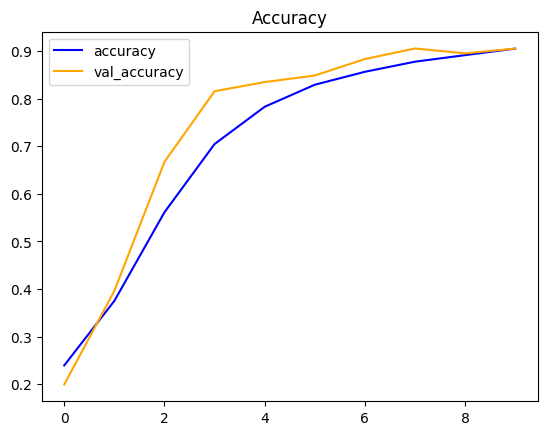

In [12]:
plt.plot(hist_df['accuracy'],color='blue',label='accuracy')
plt.plot(hist_df['val_accuracy'],color='orange',label='val_accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()
# plt.savefig('accuracy.png')

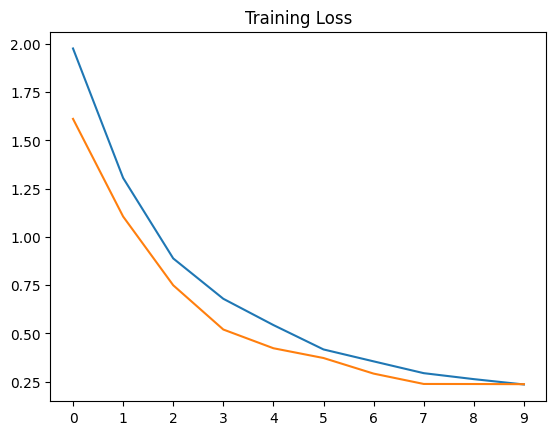

In [13]:
x=list(range(0,10))
plt.plot(hist_df['loss'])
plt.plot(hist_df['val_loss'])
plt.xticks(x)
plt.title("Training Loss")
plt.show()
# plt.savefig("loss.png")

In [14]:
model1.save("alexnet-tensorflow.h5")

c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
